In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('../src')

In [4]:
from d00_utils.db_utils import dbReadWriteClean
io_clean = dbReadWriteClean()

In [5]:
def plot_group_by_size_histogram(df, column, name):
    counts = df.groupby(column).size()
    print(counts.describe())
    plt.title(f'Counts of {name}')
    plt.xlabel('Number')
    plt.ylabel('Counts')
    counts = plt.hist(counts.values, bins=20)
    return counts[0]

In [6]:
measurement_abstract_rpt_df = io_clean.get_table('measurement_abstract_rpt')
print(measurement_abstract_rpt_df.shape)
measurement_abstract_rpt_df.head()

(1568351, 5)


,studyidk,measabstractnumber,name,value,unitname
0,2882,2,(P1/2t)AVM,2.491754,cm2
1,2882,12,Area TSVI,3.606348,cm2
2,2882,43,FE(el-ps4),37.032087,%
3,2882,46,FE(MDD-ps4),35.095355,%
4,2882,125,P1/2t VM,88.291224,ms


In [7]:
counts = measurement_abstract_rpt_df['name'].value_counts()
counts

ASC                        22447
Altura (unidad métrica)    21505
Peso (unidad métrica)      21478
IMC                        21447
ASC (Haycock)              21438
Vmáx V2 Ao                 20828
GP máx Ao                  20827
DVItd                      20623
VTD(Teich)                 20623
VTD(cúbico)                20613
SIVtd                      20548
PPVItd                     20430
DSIV/DPPVI                 20309
Masa VI(C)td               20297
Vmáx E VM                  19978
Masa VI (C)ltd             18560
Grosor relativo pared      17856
Vmáx A VM                  17617
E/A VM                     17581
VTD(MDD-ps4)               17547
DVItd ap4                  17519
VTS(MDD-ps4)               17239
FE(MDD-ps4)                17228
VS(MDD-ps4)                17224
DVIts ap4                  17211
VTD(el-ps4)                16665
AVItd ap4                  16664
AVIts ap4                  16354
VTS(el-ps4)                16354
FE(el-ps4)                 16338
          

In [8]:
len(counts[counts==1])

34

In [9]:
len(counts[counts<10])

70

count    24912.000000
mean        62.955644
std         28.507088
min          1.000000
25%         42.000000
50%         60.000000
75%         84.000000
max        146.000000
dtype: float64


array([ 572.,  412.,  670., 1103., 2135., 2246., 2522., 2280., 2243.,
       1826., 1757., 1723., 1715., 1138.,  873.,  901.,  558.,  177.,
         46.,   15.])

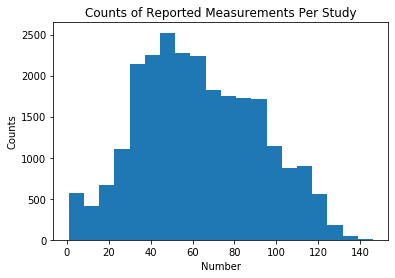

In [10]:
plot_group_by_size_histogram(measurement_abstract_rpt_df, 'studyidk', 'Reported Measurements Per Study')

In [ ]:
measgraphref_df = io_clean.get_table('a_measgraphref')
print(measgraphref_df.shape)
measgraphref_df.head()

In [ ]:
filtered_measgraphref_df = measgraphref_df[(measgraphref_df["instanceidk"]!=-1) & (measgraphref_df["indexinmglist"]!=-1)]
filtered_measgraphref_df.shape

In [ ]:
filtered_measgraphref_df['indexinmglist'].unique()

In [ ]:
filtered_measgraphref_df['howentered'].unique()

In [ ]:
(filtered_measgraphref_df.groupby('instanceidk').first()[['srinstanceidk', 'imagesopinstanceuid', 'measurementuid']]!="").sum()

In [ ]:
plot_group_by_size_histogram(filtered_measgraphref_df, "studyidk", "Graphical Measurements Per Study")

In [ ]:
plot_group_by_size_histogram(filtered_measgraphref_df, "instanceidk", "Graphical Measurements Per Instance")

In [ ]:
grouped_measgraphref_df = filtered_measgraphref_df.groupby(["studyidk", "instanceidk"]).size().reset_index()

In [ ]:
plot_group_by_size_histogram(grouped_measgraphref_df, "studyidk", "Instances Per Study")

In [ ]:
grouped_measgraphref_df = filtered_measgraphref_df.groupby(["instanceidk", "indexinmglist"]).size().reset_index()

In [ ]:
plot_group_by_size_histogram(grouped_measgraphref_df, "instanceidk", "Frames Per Instance")